# Assignment 2
Lauri Pessi | bft860

## Dataset: sales_data_sample.csv

In [18]:
import pandas as pd, matplotlib.pyplot as plt, math

# Import data and take a peek
df = pd.read_csv('sales_data_sample.csv', encoding = 'cp1252', delimiter=',', quotechar='"', quoting=2)
print('Rows: ' + str(df.shape[0]))
print('Cols: ' + str(df.shape[1]))
df.head(12)

Rows: 2823
Cols: 25


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41.0,94.74,2.0,3884.34,7/1/2003 0:00,Shipped,3.0,7.0,2003.0,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45.0,83.26,6.0,3746.70,8/25/2003 0:00,Shipped,3.0,8.0,2003.0,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49.0,100.00,14.0,5205.27,10/10/2003 0:00,Shipped,4.0,10.0,2003.0,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36.0,96.66,1.0,3479.76,10/28/2003 0:00,Shipped,4.0,10.0,2003.0,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,"10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipp...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"10188,48,100,1,5512.32,11/18/2003 0:00,Shipped...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10201,22.0,98.57,2.0,2168.54,12/1/2003 0:00,Shipped,4.0,12.0,2003.0,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,"10211,41,100,14,4708.44,1/15/2004 0:00,Shipped...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Get some idea of the measures
df.describe()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,35.137931,83.950259,6.429708,3568.921194,2.777851,7.305703,2003.801724,101.104775
std,9.730179,20.122152,4.230388,1847.735232,1.176123,3.502589,0.698712,40.018074
min,6.000000,27.220000,1.000000,541.140000,1.000000,1.000000,2003.000000,33.000000
25%,27.000000,69.870000,3.000000,2216.580000,2.000000,4.000000,2003.000000,68.000000
50%,35.000000,96.700000,6.000000,3194.395000,3.000000,8.000000,2004.000000,99.000000
75%,43.000000,100.000000,9.000000,4508.270000,4.000000,11.000000,2004.000000,124.000000
max,85.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.000000,214.000000


<BarContainer object of 2823 artists>

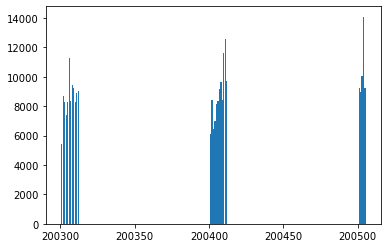

In [10]:
df['Yearmonth'] = df.YEAR_ID * 100 + df.MONTH_ID

plt.bar(x=df.Yearmonth, height=df.SALES)